In [5]:
import numpy as np 
import pandas as pd
import sklearn
import seaborn as sns 
from matplotlib import pyplot as plt

In [6]:
df=pd.read_csv("/content/heart_disease_data.csv")

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.shape  

(303, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


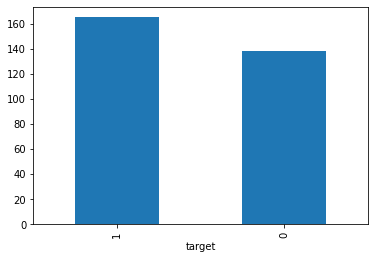

In [12]:
df.target.value_counts().plot(kind='bar',xlabel='target')

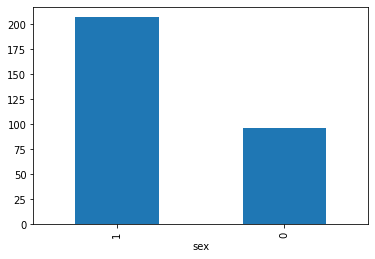

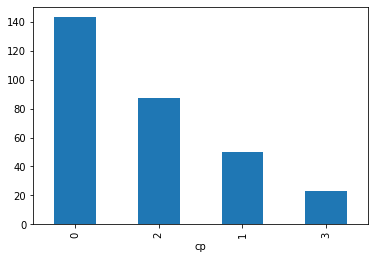

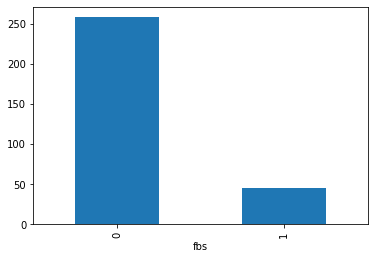

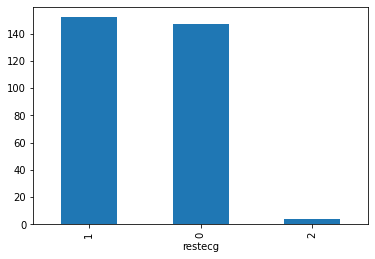

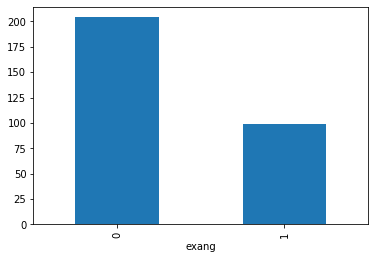

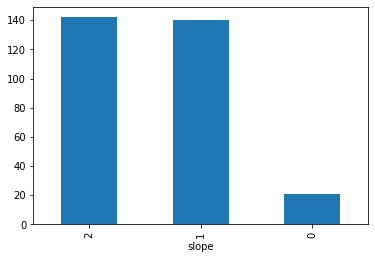

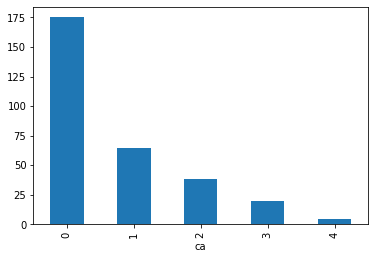

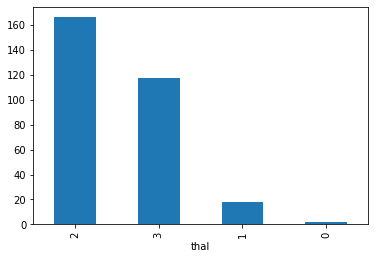

In [13]:
cat_features=['sex','cp','fbs','restecg','exang','slope','ca','thal']
for col in cat_features:
    plt.figure()
    df[col].value_counts().plot(kind='bar',xlabel=col)
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

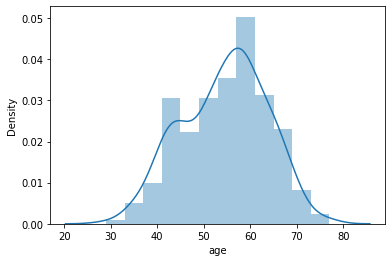

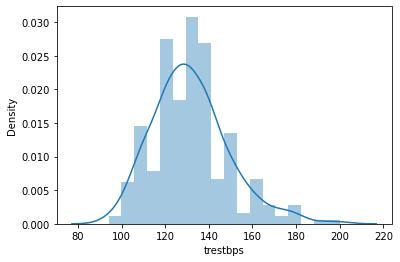

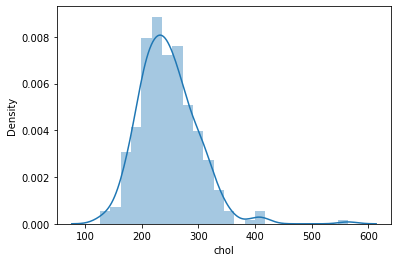

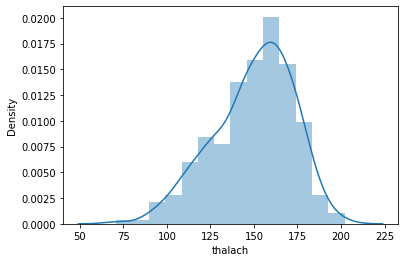

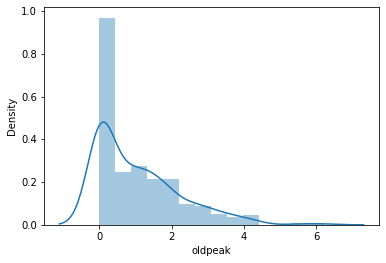

In [14]:
num_features=['age','trestbps','chol','thalach','oldpeak']
for q in num_features:
    plt.figure()
    sns.distplot(df[q])

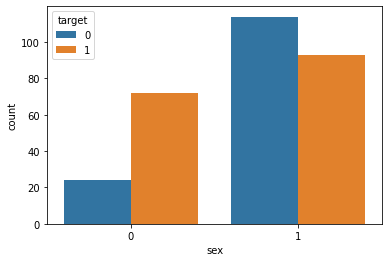

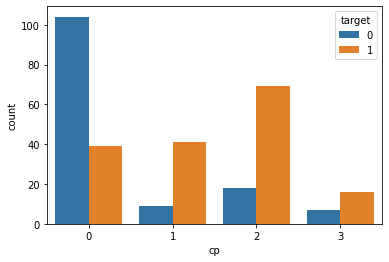

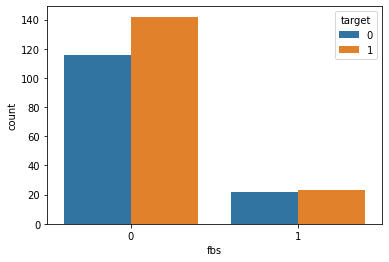

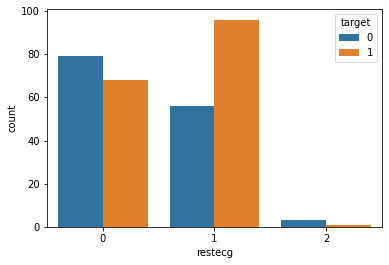

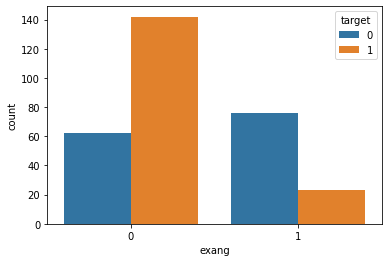

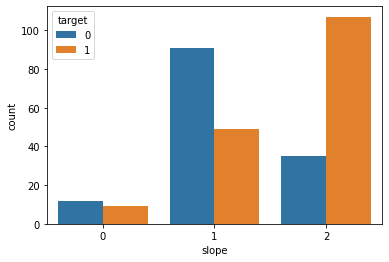

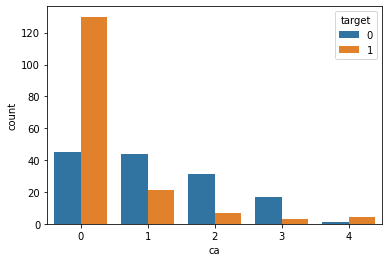

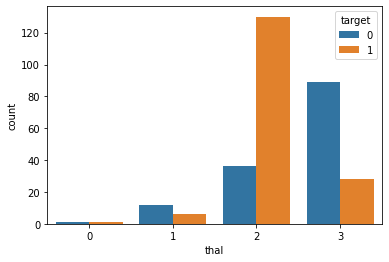

In [15]:
for k in cat_features:
    plt.figure()
    sns.countplot(x=k, hue = "target", data = df)
    plt.show()

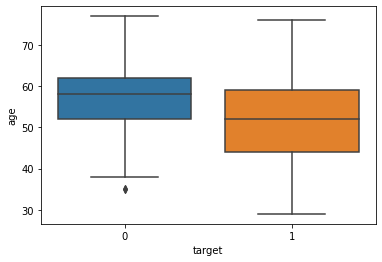

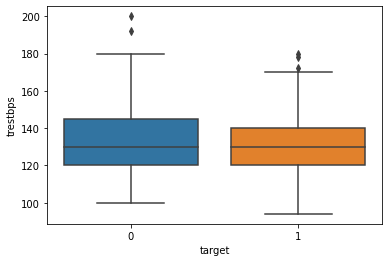

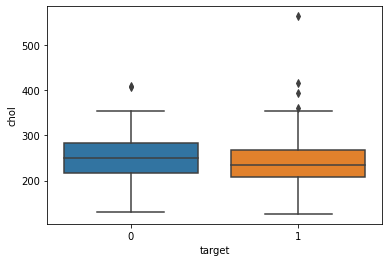

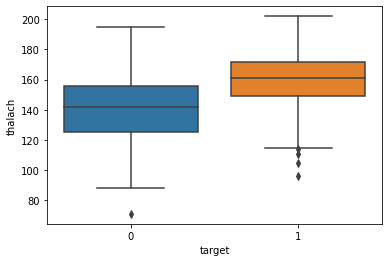

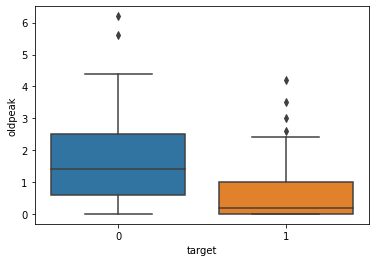

In [16]:
for b in num_features:
    plt.figure()
    sns.boxplot(x='target', y=b,data=df)
    plt.show()

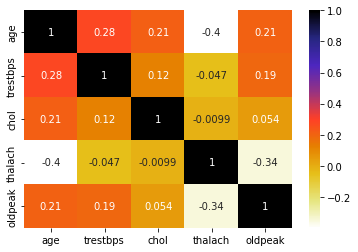

In [17]:
sns.heatmap(df[['age','trestbps','chol','thalach','oldpeak']].corr(),annot=True,cmap=plt.cm.CMRmap_r)

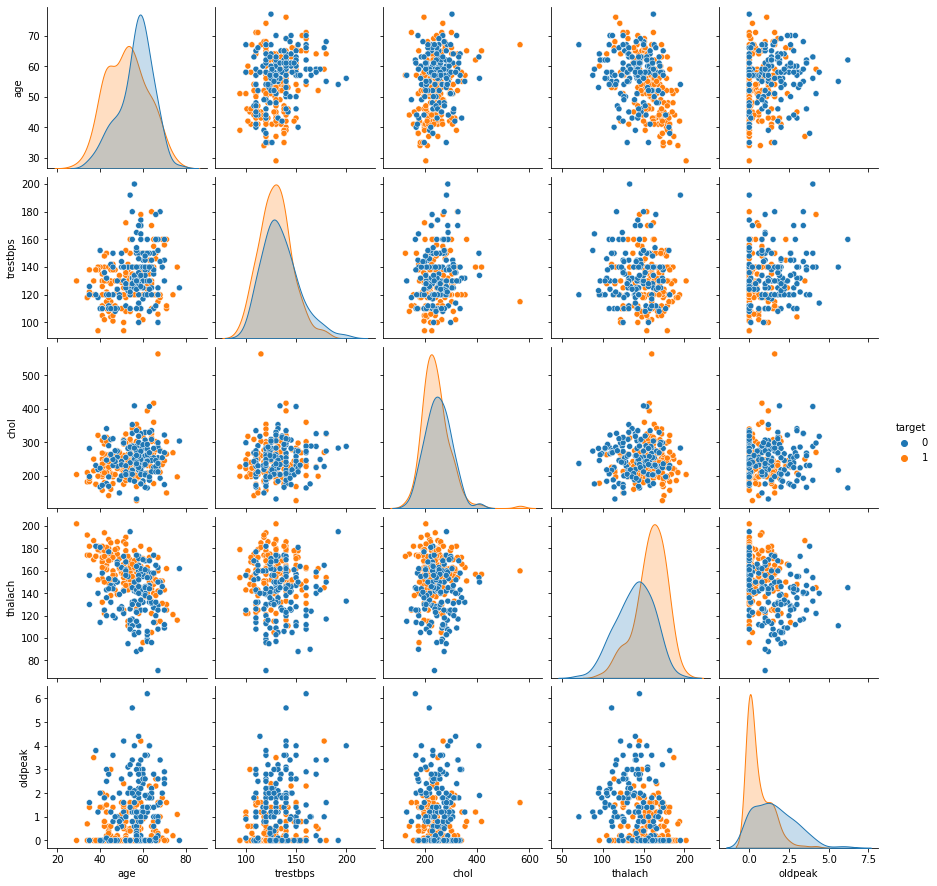

In [18]:
sns.pairplot(
    df,hue='target',
    x_vars=['age','trestbps','chol','thalach','oldpeak'],
    y_vars=['age','trestbps','chol','thalach','oldpeak'],
)

skewness of age is -0.2024633654856539


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


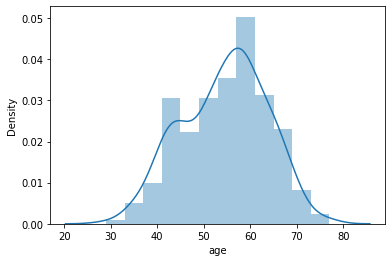

skewness of trestbps is 0.7137684379181465


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


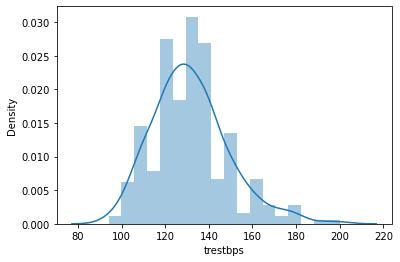

skewness of chol is 1.1434008206693387


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


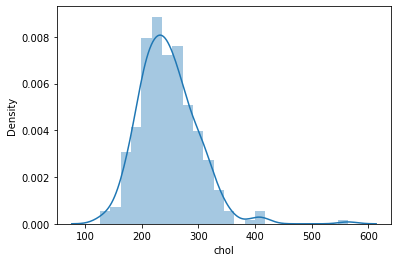

skewness of thalach is -0.5374096526832253


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


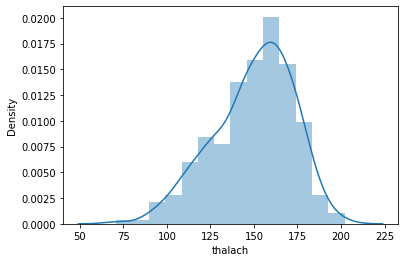

skewness of oldpeak is 1.269719930601997


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


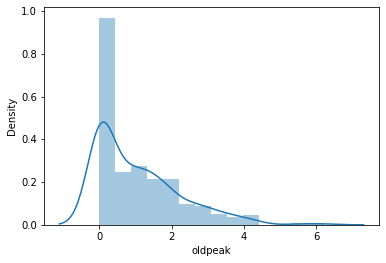

In [19]:
from scipy import stats
for s in num_features:
    print(f'skewness of {s} is {df[s].skew()}')
    plt.figure()
    sns.distplot(df[s]);
    plt.show()


bps skewness before 0.7137684379181465


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


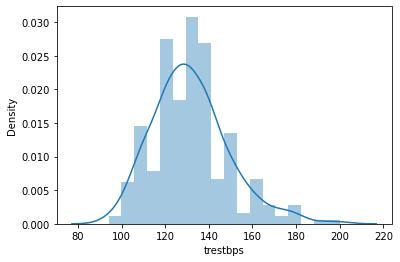

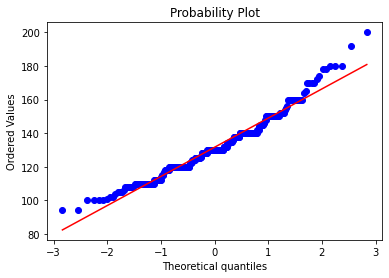

In [20]:
from scipy import stats
print(f"bps skewness before {df['trestbps'].skew()}")
sns.distplot(df['trestbps']);
fig = plt.figure()
res = stats.probplot(df['trestbps'], plot=plt)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.2817574464672539 bps skewness after


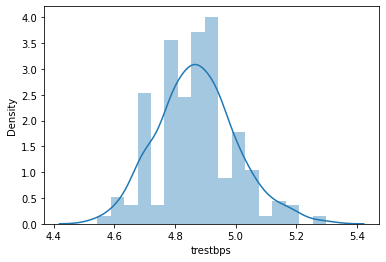

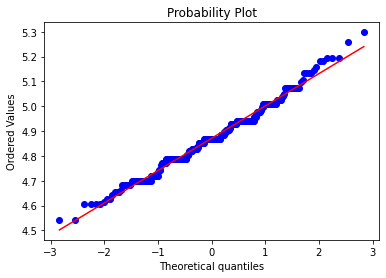

In [21]:
sns.distplot(np.log(df['trestbps']))
fig = plt.figure()
bps = stats.probplot(np.log(df['trestbps']), plot=plt)
print(np.log(df['trestbps']).skew(),'bps skewness after')

In [22]:
df['trestbps']=np.log(df['trestbps'])

skewness of chol before is 1.1434008206693387


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


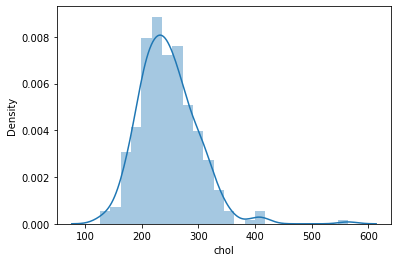

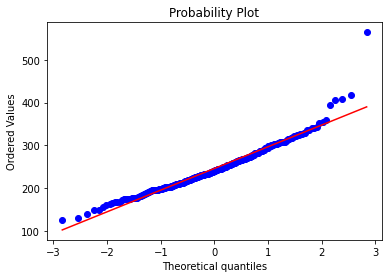

In [23]:
# for chol feature
print("skewness of chol before is",df['chol'].skew())
sns.distplot(df['chol']);
fig = plt.figure()
res = stats.probplot(df['chol'], plot=plt)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.08666713455435988 chol skewness after


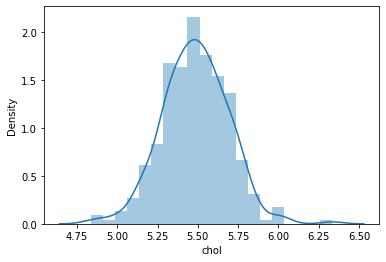

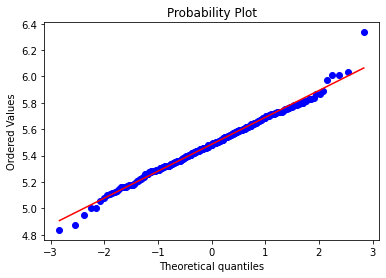

In [24]:
sns.distplot(np.log(df['chol']))
fig = plt.figure()
bps = stats.probplot(np.log(df['chol']), plot=plt)
print(np.log(df['chol']).skew(),'chol skewness after')

In [25]:
df['chol']=np.log(df['chol'])

skewness of oldpeak is 1.269719930601997


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


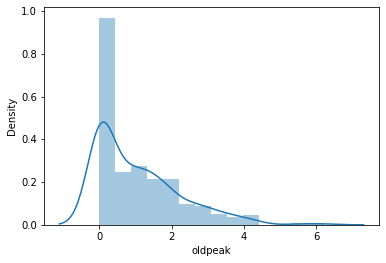

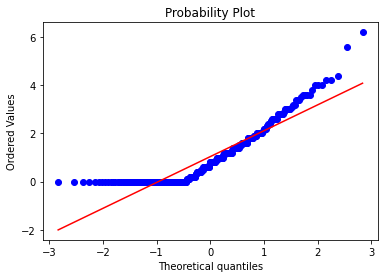

In [26]:
# for oldpeak feature
print("skewness of oldpeak is",df['oldpeak'].skew())
sns.distplot(df['oldpeak']);
fig = plt.figure()
res = stats.probplot(df['oldpeak'], plot=plt)

#Feature Selection Part

In [27]:
X=df.drop('target',axis=1)
y=df['target']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y, random_state=10)

In [29]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
274,47,1,0,4.700480,5.616771,0,0,118,1,1.0,1,1,2
270,46,1,0,4.787492,5.517453,0,0,144,0,0.8,2,0,3
292,58,0,0,5.135798,5.416100,1,0,146,1,2.8,1,2,1
249,69,1,2,4.941642,5.537334,0,0,146,0,2.0,1,3,3
231,57,1,0,5.105945,5.666427,1,0,124,0,1.0,1,3,3


In [30]:
from sklearn.feature_selection import VarianceThreshold
var_thresh=VarianceThreshold(2)
X_high_variance = var_thresh.fit_transform(X_train[num_features])

In [31]:
var_thresh.get_support()

array([ True, False, False,  True, False])

In [32]:
num_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [33]:
# mutual_info_classsifier
# also called as the infromation gain between the two variable
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info


array([0.        , 0.02628511, 0.13235182, 0.03069092, 0.04573892,
       0.04633242, 0.010395  , 0.10516053, 0.12442729, 0.08292977,
       0.10899691, 0.06644429, 0.14927312])

In [34]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info=mutual_info.sort_values(ascending=False)
mutual_info

thal        0.149273
cp          0.132352
exang       0.124427
slope       0.108997
thalach     0.105161
oldpeak     0.082930
ca          0.066444
fbs         0.046332
chol        0.045739
trestbps    0.030691
sex         0.026285
restecg     0.010395
age         0.000000
dtype: float64

In [35]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)
f_p_values

(array([1.46585467e+01, 4.45803213e+00, 4.54736467e+01, 1.65648587e-02,
        1.09256420e-02, 3.00000000e-01, 4.36771654e+00, 1.43018625e+02,
        3.57796296e+01, 6.43674042e+01, 9.74414414e+00, 4.46913793e+01,
        4.12456768e+00]),
 array([1.28849053e-04, 3.47374942e-02, 1.54706431e-11, 8.97591443e-01,
        9.16752098e-01, 5.83882421e-01, 3.66260415e-02, 5.82315906e-33,
        2.20946011e-09, 1.03252281e-15, 1.79894870e-03, 2.30670701e-11,
        4.22648183e-02]))

In [36]:
# 2nd values in the array called as p-vaules,the smaller it is the better.
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
P_values=p_values.sort_values(ascending=True)
p_values

age         1.288491e-04
sex         3.473749e-02
cp          1.547064e-11
trestbps    8.975914e-01
chol        9.167521e-01
fbs         5.838824e-01
restecg     3.662604e-02
thalach     5.823159e-33
exang       2.209460e-09
oldpeak     1.032523e-15
slope       1.798949e-03
ca          2.306707e-11
thal        4.226482e-02
dtype: float64

In [37]:
# 1st vlaue in the array called as  f-scores, the biggest it is the better.
f_values=pd.Series(f_p_values[0])
f_values.index=X_train.columns
f_values=f_values.sort_values(ascending=False)
f_values

thalach     143.018625
oldpeak      64.367404
cp           45.473647
ca           44.691379
exang        35.779630
age          14.658547
slope         9.744144
sex           4.458032
restecg       4.367717
thal          4.124568
fbs           0.300000
trestbps      0.016565
chol          0.010926
dtype: float64

In [38]:
from sklearn.feature_selection import f_classif
f_scores=f_classif(X_train,y_train)

In [39]:
f_scores

(array([ 9.89261263, 14.95524575, 51.28610206,  4.75555924,  1.47414649,
         0.35002431,  8.32763053, 54.73788714, 63.97770389, 60.73622185,
        39.54621627, 34.00980762, 28.50072365]),
 array([1.86888112e-03, 1.41825412e-04, 9.71605617e-12, 3.01753794e-02,
        2.25885967e-01, 5.54656230e-01, 4.26024973e-03, 2.30380604e-12,
        5.34119740e-14, 1.97235973e-13, 1.50205480e-09, 1.76206102e-08,
        2.16936093e-07]))

In [40]:
f_stat_scores=pd.Series(f_scores[0])
f_stat_scores.apply(float)
f_stat_scores.index=X_train.columns
f_stat_scores=f_stat_scores.sort_values(ascending=False)
f_stat_scores


exang       63.977704
oldpeak     60.736222
thalach     54.737887
cp          51.286102
slope       39.546216
ca          34.009808
thal        28.500724
sex         14.955246
age          9.892613
restecg      8.327631
trestbps     4.755559
chol         1.474146
fbs          0.350024
dtype: float64

In [41]:
p_stat=pd.Series(f_scores[1])
p_stat.apply(float)
p_stat.index=X_train.columns
p_stat=p_stat.sort_values(ascending=True)
p_stat

exang       5.341197e-14
oldpeak     1.972360e-13
thalach     2.303806e-12
cp          9.716056e-12
slope       1.502055e-09
ca          1.762061e-08
thal        2.169361e-07
sex         1.418254e-04
age         1.868881e-03
restecg     4.260250e-03
trestbps    3.017538e-02
chol        2.258860e-01
fbs         5.546562e-01
dtype: float64

#Feature-Scaling

In [42]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [43]:
scaler.fit(X_train[num_features])

StandardScaler()

In [44]:
X_train[num_features]=scaler.transform(X_train[num_features])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [45]:
X_train.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
274,-0.792156,1,0,-1.342596,0.677377,0,0,-1.468731,1,-0.071206,1,1,2
270,-0.901951,1,0,-0.678742,0.184042,0,0,-0.279074,0,-0.238506,2,0,3
292,0.415587,0,0,1.978665,-0.319398,1,0,-0.187562,1,1.434494,1,2,1


In [46]:
scaler.fit(X_test[num_features])

StandardScaler()

In [47]:
X_test[num_features]=scaler.transform(X_test[num_features])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [48]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
94,-1.122689,0,1,-1.075395,-2.044988,0,1,-0.372791,0,-0.875032,1,0,2
99,-0.221583,1,2,0.131222,-0.002194,1,0,0.951517,0,-0.875032,2,3,2
280,-1.460603,1,0,0.496525,1.171940,0,1,-0.864677,1,0.958527,1,0,1
174,0.566884,1,0,0.131222,-0.844919,0,0,-0.599815,1,1.569713,1,2,3
176,0.566884,1,0,-0.721794,-0.321571,1,1,0.459631,1,0.551070,2,2,3


In [1]:
! pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 4.2 MB/s 
     |████████████████████████████████| 25.9 MB 1.3 MB/s 
     |████████████████████████████████| 268 kB 57.1 MB/s 
     |████████████████████████████████| 56 kB 4.3 MB/s 
     |████████████████████████████████| 17.0 MB 37.6 MB/s 
     |████████████████████████████████| 10.4 MB 23.9 MB/s 
     |████████████████████████████████| 1.7 MB 52.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 3.3 MB 33.8 MB/s 
     |████████████████████████████████| 2.0 MB 38.7 MB/s 
     |████████████████████████████████| 88 kB 6.4 MB/s 
     |████████████████████████████████| 137 kB 39.6 MB/s 
     |████████████████████████████████| 636 kB 51.8 MB/s 
     |████████████████████████████████|

In [49]:
from pycaret.classification import *

In [50]:
new_x_train=X_train.drop('fbs',axis=1).copy()
new_x_train['target']=y_train

In [60]:
len(new_x_train.columns)

13

In [53]:
s = setup(new_x_train, target = 'target')

,Description,Value
0,session_id,6795
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(242, 13)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='target',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [54]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8636,0.9472,0.8767,0.8971,0.8797,0.7200,0.7362,0.366
lda,Linear Discriminant Analysis,0.8518,0.9415,0.8867,0.8669,0.8722,0.6939,0.7041,0.023
ridge,Ridge Classifier,0.8460,0.0000,0.8767,0.8676,0.8674,0.6815,0.6920,0.013
rf,Random Forest Classifier,0.8342,0.9136,0.8578,0.8584,0.8553,0.6605,0.6657,0.462
lightgbm,Light Gradient Boosting Machine,0.8342,0.9104,0.8778,0.8570,0.8598,0.6554,0.6716,0.144
svm,SVM - Linear Kernel,0.8283,0.0000,0.8144,0.8995,0.8432,0.6504,0.6693,0.013
knn,K Neighbors Classifier,0.8165,0.8945,0.8778,0.8216,0.8472,0.6171,0.6235,0.117
gbc,Gradient Boosting Classifier,0.8048,0.8913,0.8478,0.8280,0.8324,0.5970,0.6071,0.102
ada,Ada Boost Classifier,0.7934,0.8644,0.8356,0.8211,0.8202,0.5743,0.5902,0.095
nb,Naive Bayes,0.7813,0.8750,0.9289,0.7543,0.8307,0.5312,0.5579,0.014


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6795, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [55]:
evaluate_model(best)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6795, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [64]:
predictions = predict_model(best, data = X_test.drop('fbs',axis=1))

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6795, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


In [65]:
new_x_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [66]:
X_test.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [67]:
predictions

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,Label,Score
94,-1.122689,0,1,-1.075395,-2.044988,1,-0.372791,0,-0.875032,1,0,2,1,0.9855
99,-0.221583,1,2,0.131222,-0.002194,0,0.951517,0,-0.875032,2,3,2,1,0.9190
280,-1.460603,1,0,0.496525,1.171940,1,-0.864677,1,0.958527,1,0,1,0,0.8780
174,0.566884,1,0,0.131222,-0.844919,0,-0.599815,1,1.569713,1,2,3,0,0.9935
176,0.566884,1,0,-0.721794,-0.321571,1,0.459631,1,0.551070,2,2,3,0,0.8437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,-2.023794,0,2,-0.516817,-0.641846,1,0.838005,0,-0.875032,2,0,2,1,0.9970
101,0.454246,1,3,2.675436,0.439887,0,-0.107930,0,3.403272,0,0,3,0,0.9877
219,-0.784774,1,0,0.131222,0.187032,0,0.081257,1,-0.875032,2,2,3,0,0.8671
253,1.355351,1,0,-1.992923,0.924382,0,-0.864677,1,0.041748,1,2,2,0,0.6338


In [68]:
import sklearn.metrics
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, predictions.Label))

Accuracy score 0.8524590163934426


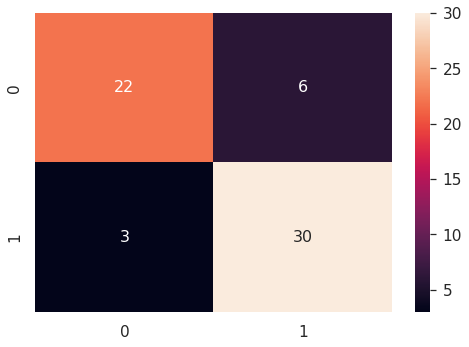

In [69]:
sns.set(font_scale=1.4)
sns.heatmap(pd.DataFrame(sklearn.metrics.confusion_matrix(y_test, predictions.Label)), annot=True, annot_kws={"size": 16}, fmt='')
plt.show()

In [70]:
print(sklearn.metrics.precision_score(y_test, predictions.Label))

0.8333333333333334


In [71]:
print(sklearn.metrics.recall_score(y_test, predictions.Label))

0.9090909090909091


In [72]:
# Own trained model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [73]:
from sklearn.svm import SVC
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train.drop('fbs',axis=1), y_train)
svc_predicted = svc.predict(X_test.drop('fbs',axis=1))
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[24  4]
 [ 3 30]]


Accuracy of Support Vector Classifier: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.88      0.91      0.90        33

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



Minimum error:- 0.09836065573770492 at K = 8


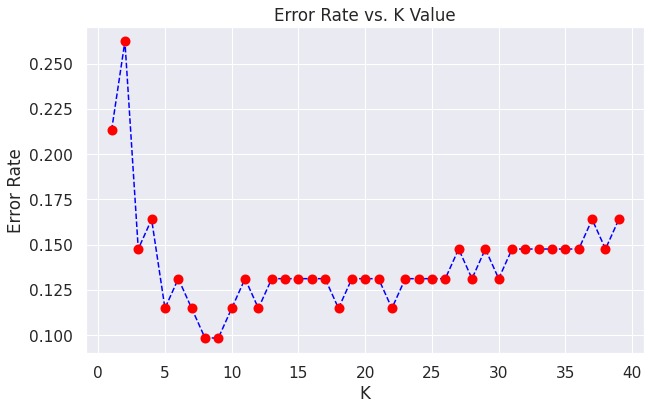

In [76]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train.drop('fbs',axis=1),y_train)
 pred_i = knn.predict(X_test.drop('fbs',axis=1))
 error_rate.append(np.mean(pred_i != y_test))
 
 

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

Maximum score:- 0.9016393442622951 at K = 8


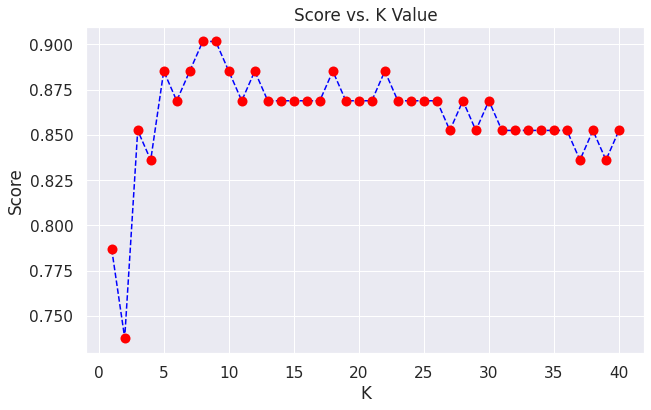

In [77]:
score = []
for i in range(1,41):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train.drop('fbs',axis=1),y_train)
 pred_i = knn.predict(X_test.drop('fbs',axis=1))
 score.append(accuracy_score(y_test, pred_i))
 


plt.figure(figsize=(10,6))
plt.plot(range(1,41),score,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Score vs. K Value')
plt.xlabel('K')
plt.ylabel('Score')
print("Maximum score:-",max(score),"at K =",score.index(max(score))+1)

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
                     weights='uniform')
knn.fit(X_train.drop('fbs',axis=1), y_train)
knn_predicted = knn.predict(X_test.drop(['fbs'],axis=1))
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[24  4]
 [ 2 31]]


Accuracy of K-NeighborsClassifier: 90.1639344262295 

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.89      0.94      0.91        33

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [79]:
from mlxtend.classifier import StackingCVClassifier

In [80]:
scv=StackingCVClassifier(classifiers=[knn,svc],meta_classifier= svc)
scv.fit(X_train.drop('fbs',axis=1).values,y_train.values)
scv_predicted = scv.predict(X_test.drop('fbs',axis=1).values)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

confussion matrix
[[23  5]
 [ 2 31]]


Accuracy of StackingCVClassifier: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        28
           1       0.86      0.94      0.90        33

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [81]:
from mlxtend.plotting import plot_decision_regions

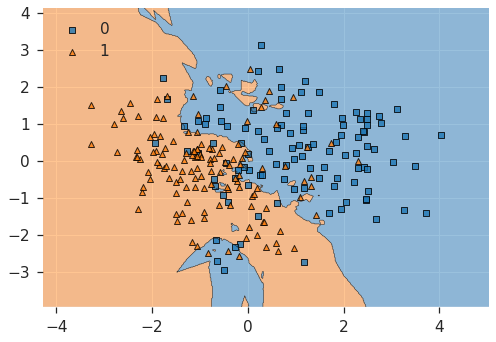

In [82]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
knn.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train.values, clf=knn, legend=2)

In [85]:
import pickle

pickle.dump(knn, open('knn.pkl', 'wb'))